**Rossman Sales Prediction**


In [ ]:
# Store - a unique Id for each store
# Sales - the turnover for any given day (this is what you are predicting)
# Customers - the number of customers on a given day
# Open - an indicator for whether the store was open: 0 = closed, 1 = open
# StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
# StoreType - differentiates between 4 different store models: a, b, c, d
# Assortment - describes an assortment level: a = basic, b = extra, c = extended , this column tells you the range of products or services offered by a store
# The Assortment column shows the variety of products a store offers:
# a (basic): Few products
# b (extra): More products
# c (extended): Many products
# Think of it like a store's product range:
# a is like a small convenience store with limited options
# b is like a medium-sized store with a moderate selection
# c is like a large supermarket with a wide variety of products
# CompetitionDistance - distance in meters to the nearest competitor store
# CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
# Promo - indicates whether a store is running a promo on that day
# Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
# Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
# PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,N

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/dataset/Data & Resources/Data _ Resources/Rossmann Stores Data.csv")
df2 = pd.read_csv("/content/drive/MyDrive/dataset/Data & Resources/Data _ Resources/store.csv")

<ipython-input-5-2695e8efebb0>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("/content/drive/MyDrive/dataset/Data & Resources/Data _ Resources/Rossmann Stores Data.csv")


In [ ]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df1.shape

(1017209, 9)

In [ ]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df2.shape

(1115, 10)

**merge df1 and df2**

In [ ]:
merge_data = pd.merge(df1, df2, on='Store')

In [ ]:
merge_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
merge_data.shape

(1017209, 18)

**EDA**

In [ ]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
merge_data.duplicated().sum()

0

In [ ]:
merge_data.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


**visualize null value**

<Axes: >

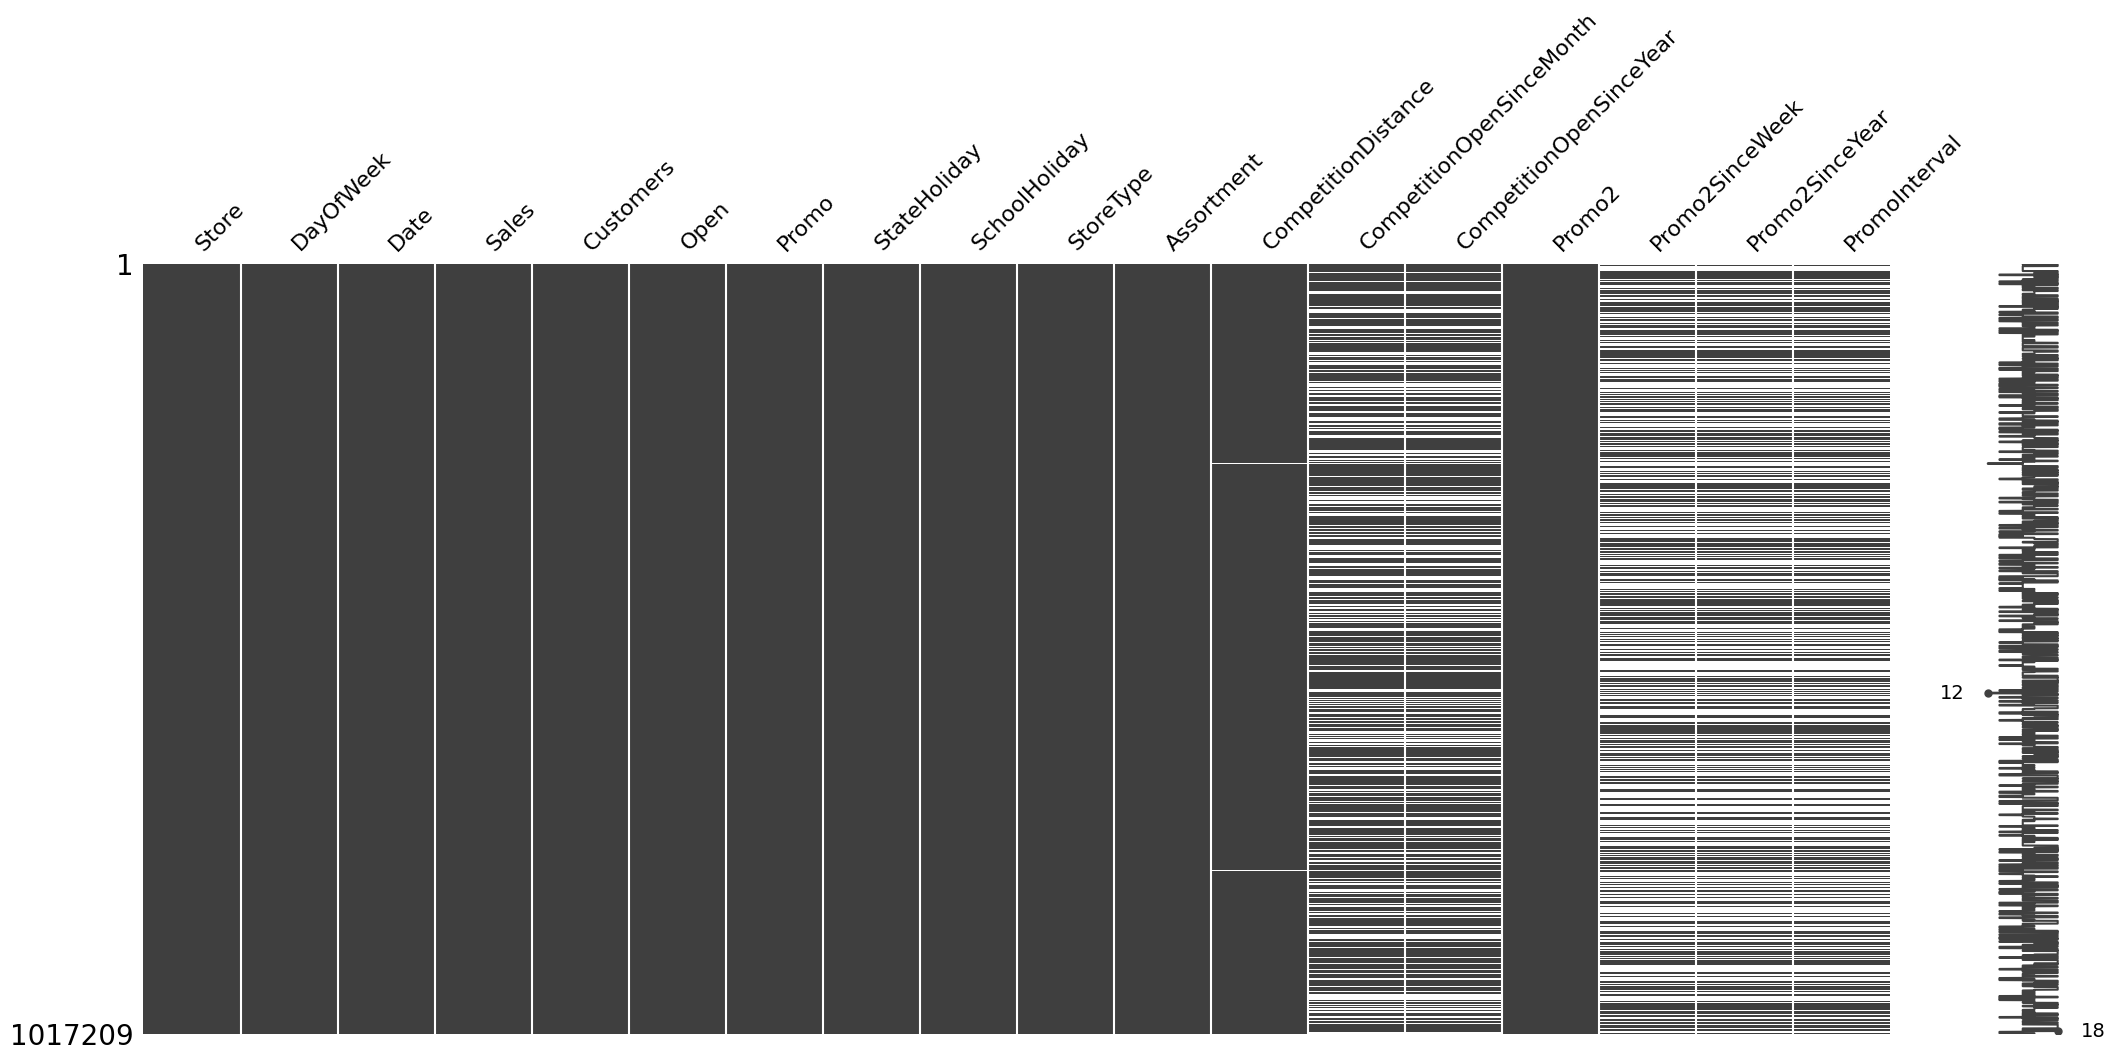

In [ ]:
import missingno as msno
msno.matrix(merge_data)

**drop null value**

In [ ]:
merge_data = merge_data.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1)

In [ ]:
merge_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,0


In [ ]:
merge_data['CompetitionDistance'].fillna(merge_data['CompetitionDistance'].median(),inplace=True)


In [ ]:
merge_data.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


<Axes: >

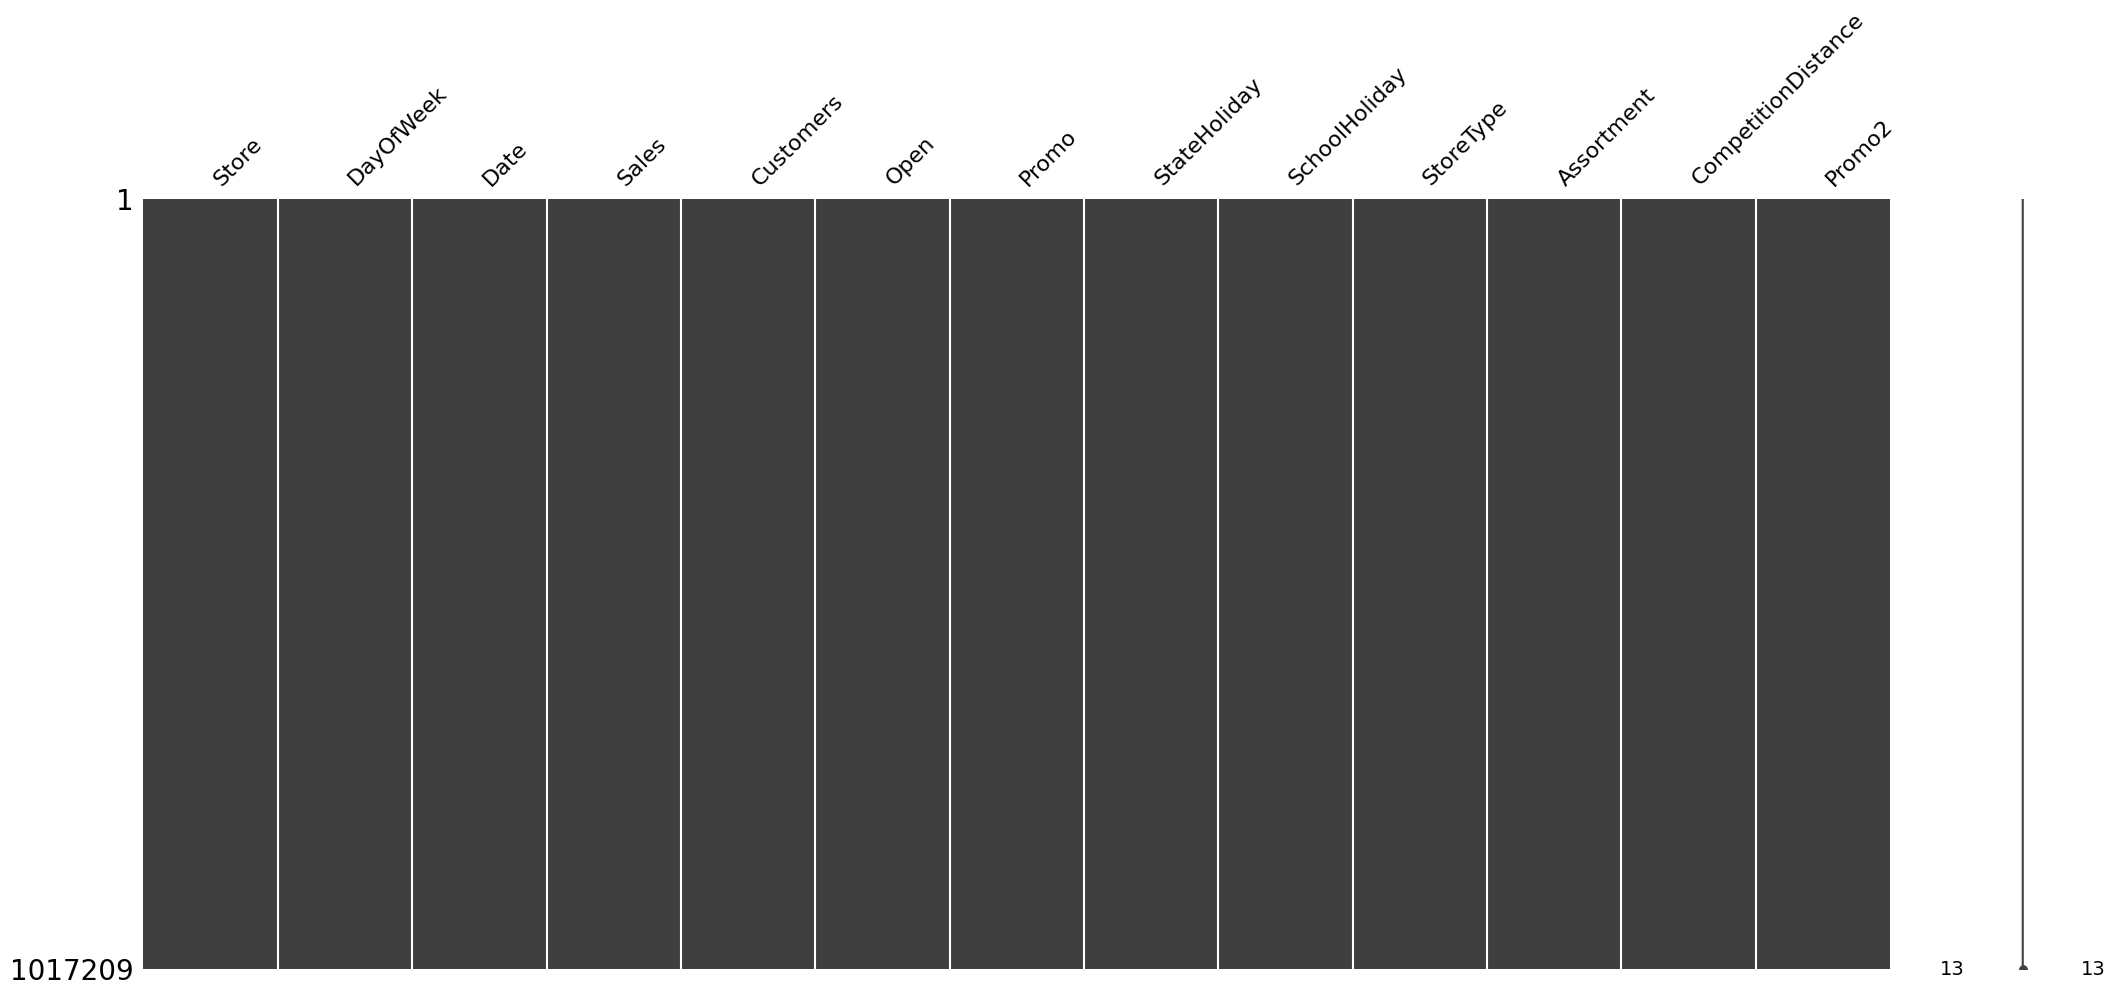

In [ ]:
import missingno as msno
msno.matrix(merge_data)

In [ ]:
merge_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,0


In [ ]:
merge_data.shape


(1017209, 13)

In [ ]:
merge_data.describe(include  = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.017209e+06,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.422034e+03,5.005638e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.706913e+03,4.999999e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,1.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.880000e+03,1.000000e+00


In [ ]:
date = ['Date']

In [ ]:
date_column = merge_data[date]
date_column.head()

,Date
0,2015-07-31
1,2015-07-30
2,2015-07-29
3,2015-07-28
4,2015-07-27


In [ ]:
date_column["Date"] = date_column["Date"].astype('datetime64[ns]')

date_column['Day'] = date_column['Date'].dt.day

date_column['Month'] = date_column['Date'].dt.month



<ipython-input-27-d460d88d515a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_column["Date"] = date_column["Date"].astype('datetime64[ns]')
<ipython-input-27-d460d88d515a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_column['Day'] = date_column['Date'].dt.day
<ipython-input-27-d460d88d515a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [ ]:
date_column.head()

,Date,Day,Month
0,2015-07-31,31,7
1,2015-07-30,30,7
2,2015-07-29,29,7
3,2015-07-28,28,7
4,2015-07-27,27,7


In [ ]:
date_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1017209 non-null  datetime64[ns]
 1   Day     1017209 non-null  int32         
 2   Month   1017209 non-null  int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 15.5 MB


In [ ]:
# convert StateHoliday values to int
merge_data["StateHoliday"].replace({'0':0, 'a':1, 'b':1, 'c':1}, inplace=True)
merge_data["StateHoliday"].unique()

array([0, 1])

In [ ]:
merge_data['StateHoliday'].value_counts()

,count
StateHoliday,
0,986159
1,31050


In [ ]:
text_columns = ['StoreType','Assortment']

In [ ]:
text_data = merge_data[text_columns]
text_data.head()

,StoreType,Assortment
0,c,a
1,c,a
2,c,a
3,c,a
4,c,a


In [ ]:
numeric_columns = ['Store','DayOfWeek','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday','CompetitionDistance','Promo2']

In [ ]:
numeric_data = merge_data[numeric_columns]
numeric_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2
0,1,5,5263,555,1,1,0,1,1270.0,0
1,1,4,5020,546,1,1,0,1,1270.0,0
2,1,3,4782,523,1,1,0,1,1270.0,0
3,1,2,5011,560,1,1,0,1,1270.0,0
4,1,1,6102,612,1,1,0,1,1270.0,0


In [ ]:
numeric_data.head().shape

(5, 10)

In [ ]:
merge_data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

**categorical_feature**

In [ ]:
text_data.head()

,StoreType,Assortment
0,c,a
1,c,a
2,c,a
3,c,a
4,c,a


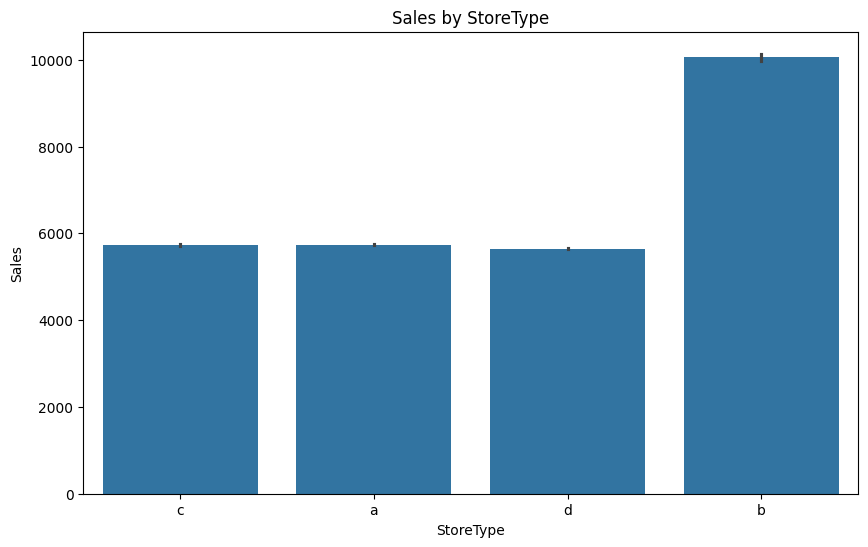

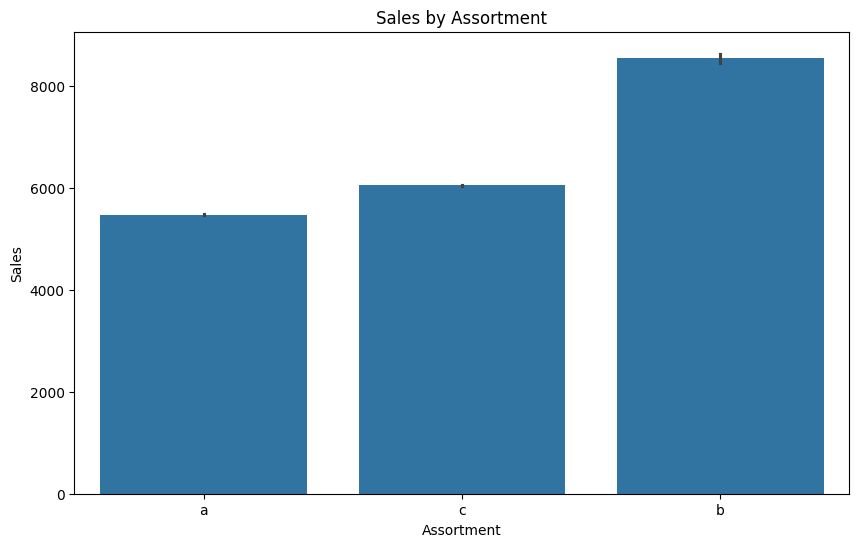

In [ ]:
for value in text_columns:
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=merge_data[value], y=merge_data['Sales'])
    plt.title(f'Sales by {value}')
    plt.xlabel(value)
    plt.ylabel('Sales')
    plt.show()

In [ ]:
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','Promo2']


In [ ]:
categorical_data = merge_data[categorical_variables]
categorical_data.head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Promo2
0,5,1,1,0,1,0
1,4,1,1,0,1,0
2,3,1,1,0,1,0
3,2,1,1,0,1,0
4,1,1,1,0,1,0


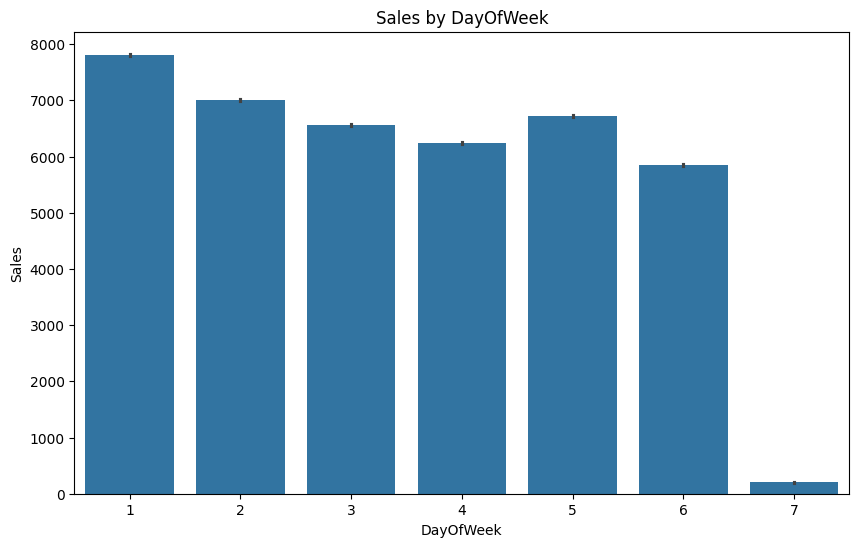

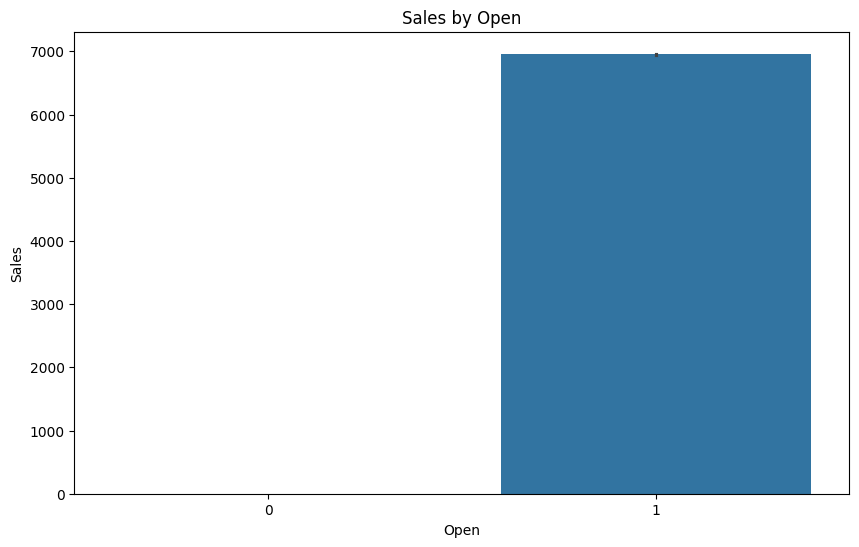

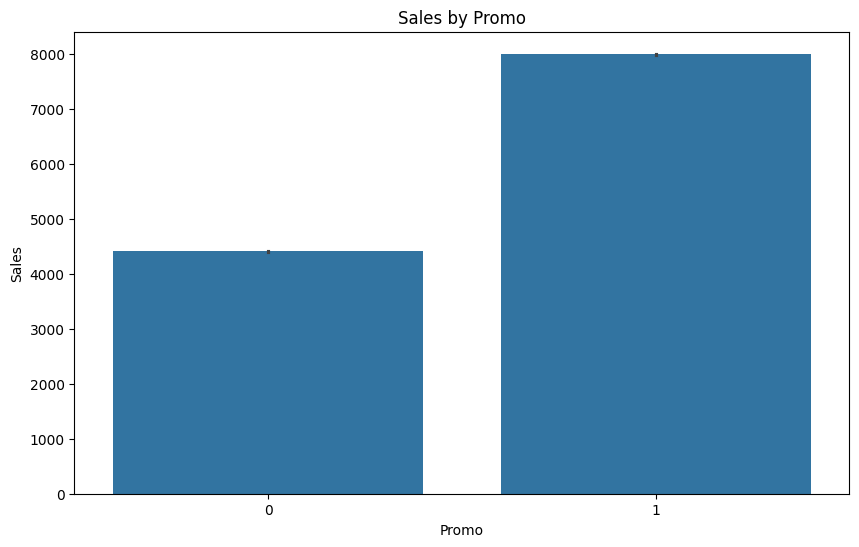

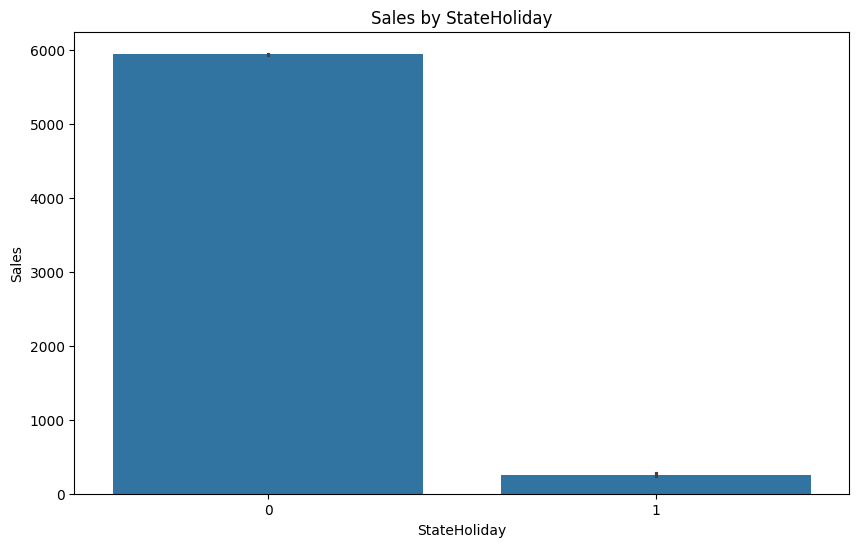

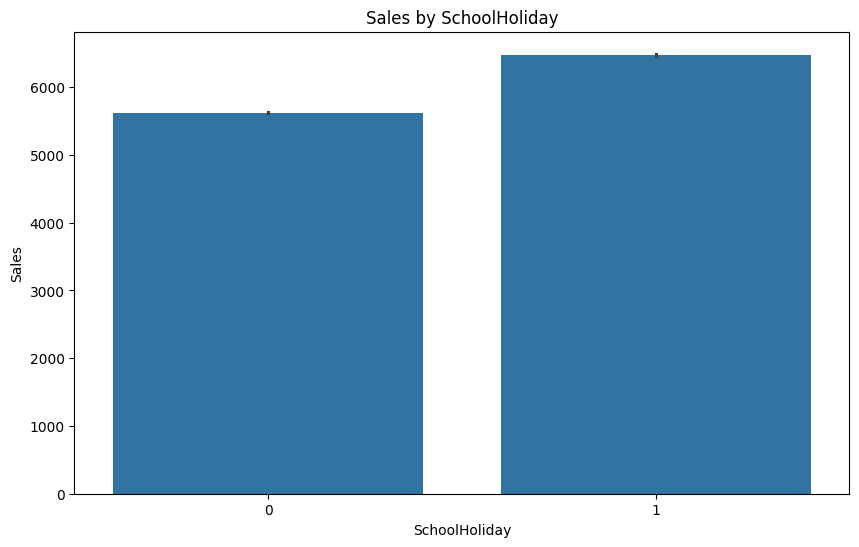

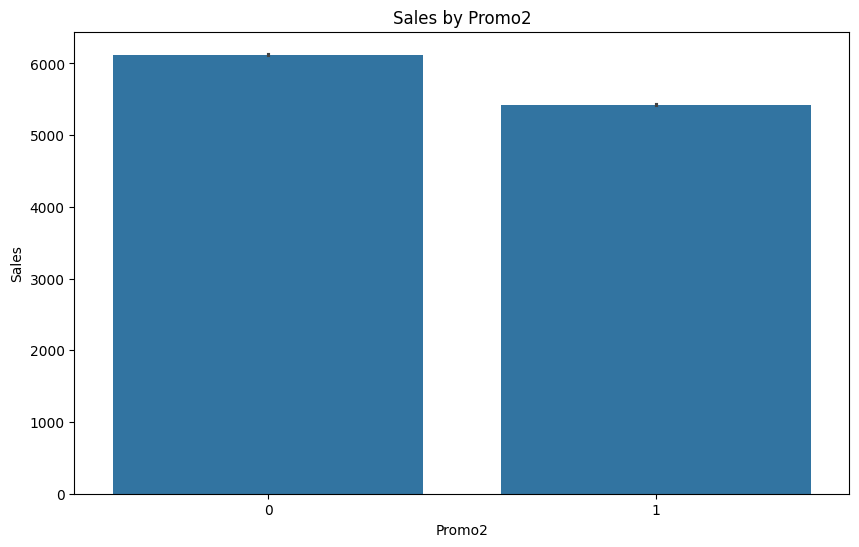

In [ ]:
for value in categorical_variables:
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=merge_data[value], y=merge_data['Sales'])
    plt.title(f'Sales by {value}')
    plt.xlabel(value)
    plt.ylabel('Sales')
    plt.show()

<Axes: xlabel='Open', ylabel='count'>

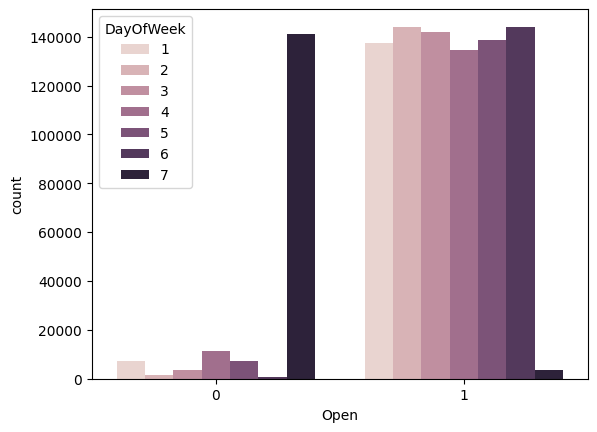

In [ ]:
sns.countplot(x=merge_data["Open"], hue=merge_data["DayOfWeek"])


In [ ]:
merge_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,0


In [ ]:
continues_columns = ['Store','Sales','Customers','CompetitionDistance']

In [ ]:
continues_data = merge_data[continues_columns]
continues_data.head()

,Store,Sales,Customers,CompetitionDistance
0,1,5263,555,1270.0
1,1,5020,546,1270.0
2,1,4782,523,1270.0
3,1,5011,560,1270.0
4,1,6102,612,1270.0


In [ ]:
continues_data.corr()

,Store,Sales,Customers,CompetitionDistance
Store,1.000000,0.005126,0.024325,-0.026451
Sales,0.005126,1.000000,0.894711,-0.018870
Customers,0.024325,0.894711,1.000000,-0.102363
CompetitionDistance,-0.026451,-0.018870,-0.102363,1.000000


<Axes: >

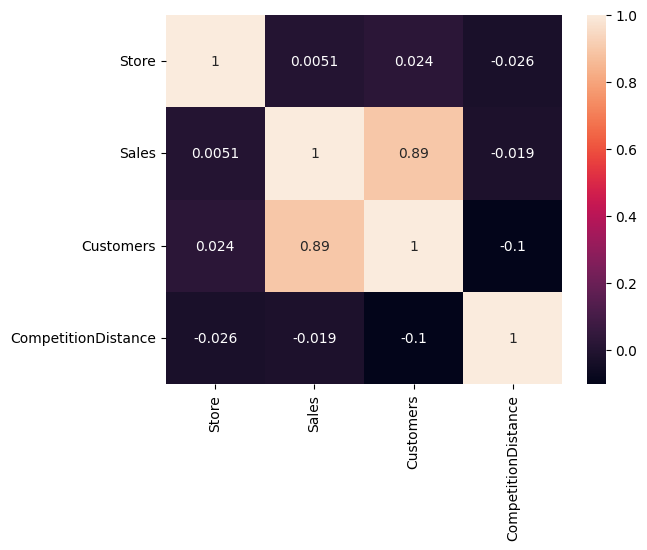

In [ ]:
sns.heatmap(continues_data.corr(), annot=True)

<Axes: >

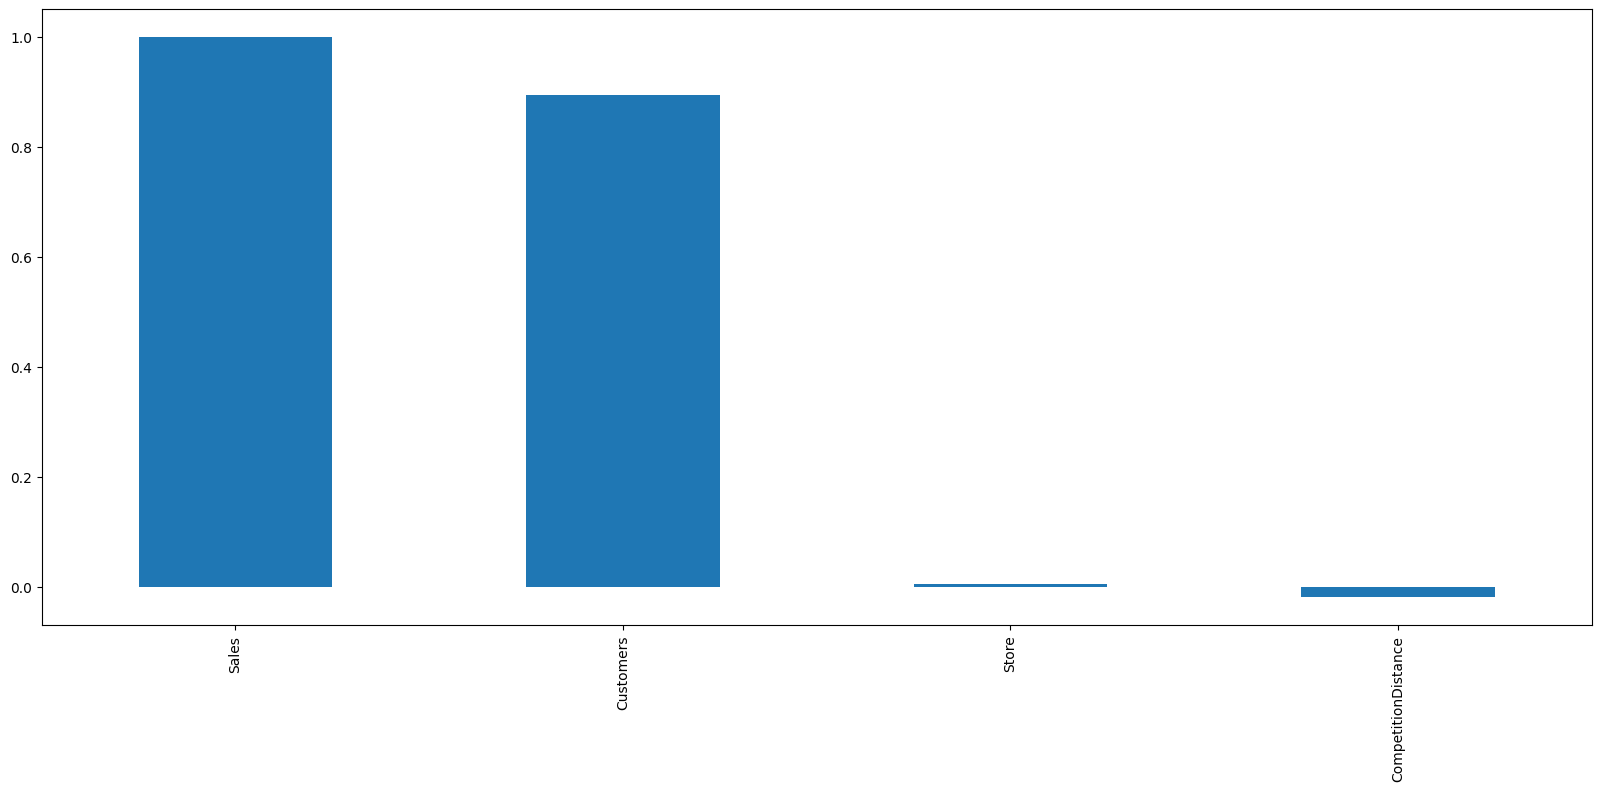

In [ ]:
plt.figure(figsize=(20,8))
continues_data.corr()['Sales'].sort_values(ascending=False).plot(kind='bar')

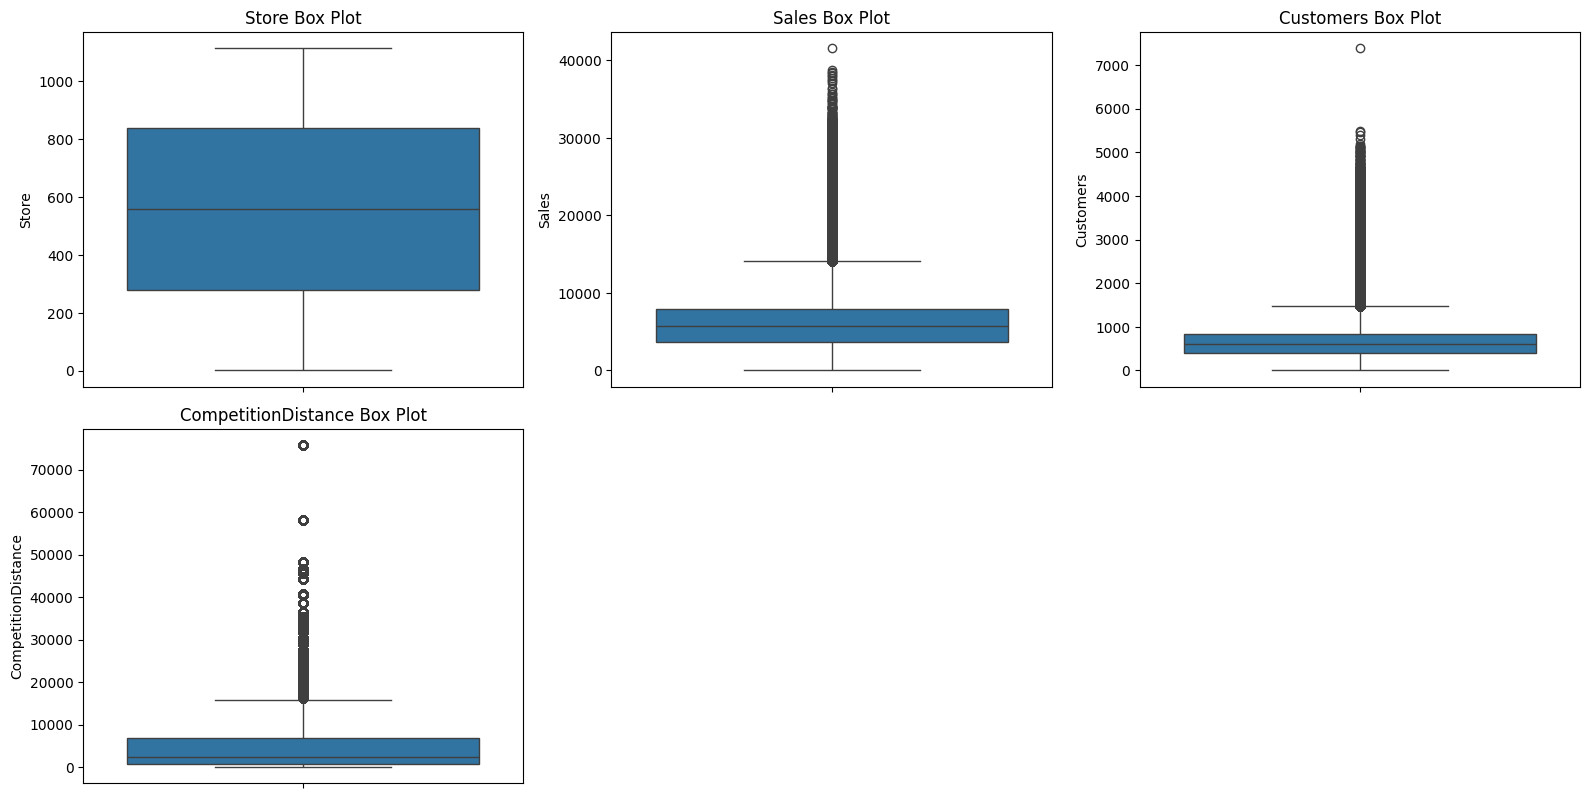

In [ ]:
plt.figure(figsize=(16, 12))
for i in range(len(continues_columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=continues_data[continues_columns[i]])
    plt.title(f'{continues_columns[i]} Box Plot')
plt.tight_layout()
plt.show()


handle outlier

In [ ]:
for column in continues_columns:
    Q1 = continues_data[column].quantile(0.25)
    Q3 = continues_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (continues_data[column] < lower_bound) | (continues_data[column] > upper_bound)
    continues_data.loc[outliers, column] = np.nan

    continues_data[column].fillna(continues_data[column].mean(), inplace=True)


<ipython-input-119-64c58a54519e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continues_data[column].fillna(continues_data[column].mean(), inplace=True)
<ipython-input-119-64c58a54519e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continues_data[column].fillna(continues_data[column].mean(), inplace=True)
<ipython-input-119-64c58a54519e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continues_data[column].fillna(continues_

In [ ]:
continues_data.head()

,Store,Sales,Customers,CompetitionDistance
0,1.0,5263.0,555.0,1270.0
1,1.0,5020.0,546.0,1270.0
2,1.0,4782.0,523.0,1270.0
3,1.0,5011.0,560.0,1270.0
4,1.0,6102.0,612.0,1270.0


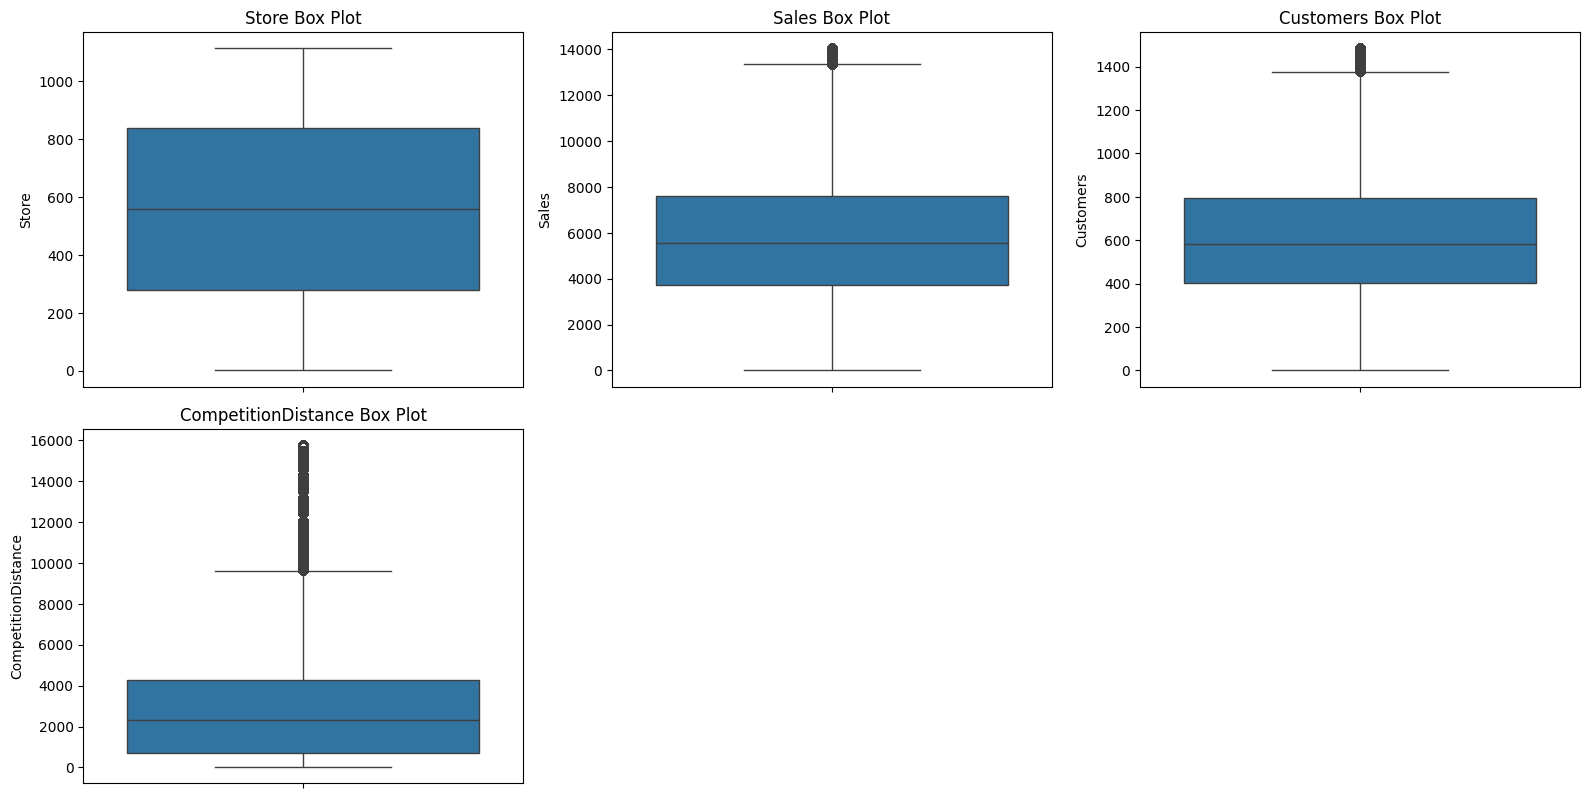

In [ ]:
plt.figure(figsize=(16, 12))
for i in range(len(continues_columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=continues_data[continues_columns[i]])
    plt.title(f'{continues_columns[i]} Box Plot')
plt.tight_layout()
plt.show()


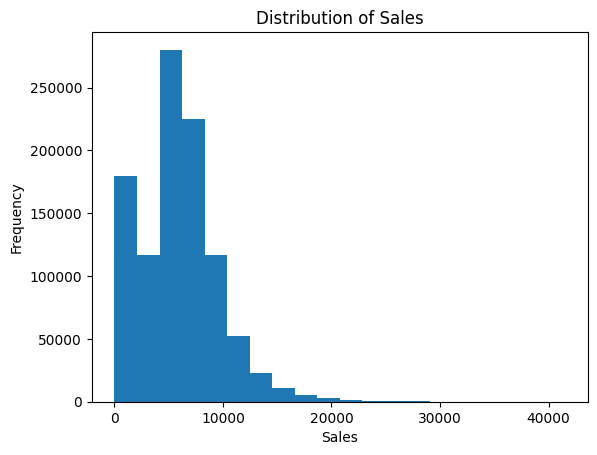

In [ ]:
plt.hist(merge_data['Sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

<ipython-input-123-9fcaa15a5862>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_data['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

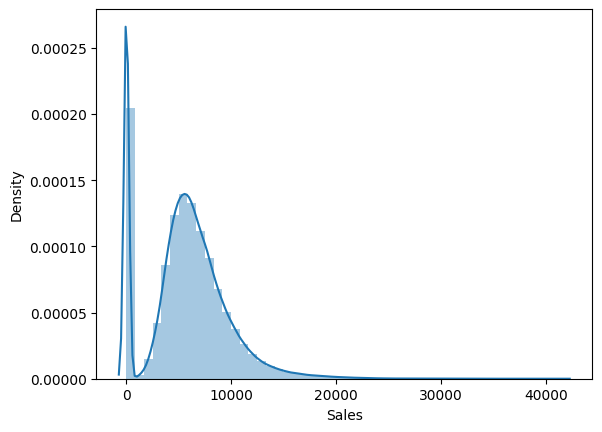

In [ ]:
sns.distplot(merge_data['Sales'])

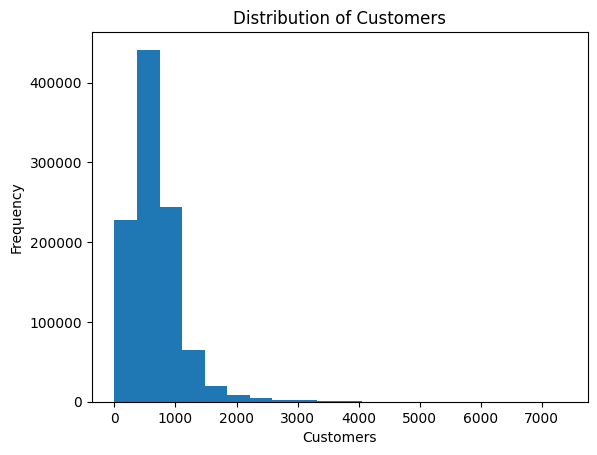

In [ ]:
plt.hist(merge_data['Customers'], bins=20)
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.title('Distribution of Customers')
plt.show()

<ipython-input-125-0cfad834d9a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_data['Customers'])


<Axes: xlabel='Customers', ylabel='Density'>

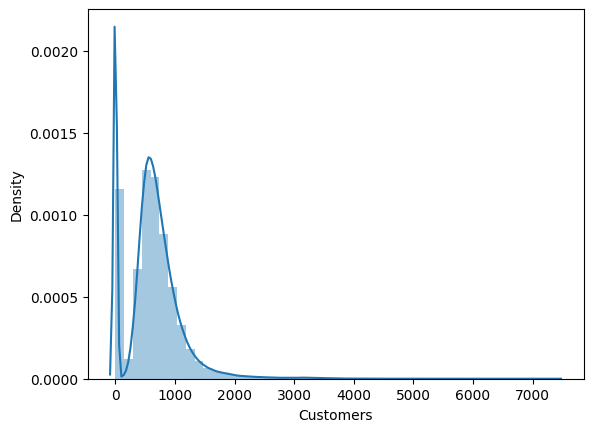

In [ ]:
sns.distplot(merge_data['Customers'])

In [ ]:
sales = continues_data['Sales']
sales.head()

,Sales
0,5263.0
1,5020.0
2,4782.0
3,5011.0
4,6102.0


In [ ]:
continues_data = continues_data.drop(['Sales','CompetitionDistance'], axis=1)

In [ ]:
continues_data.shape

(1017209, 2)

In [ ]:
continues_data.head()

,Store,Customers
0,1.0,555.0
1,1.0,546.0
2,1.0,523.0
3,1.0,560.0
4,1.0,612.0


In [ ]:
# new_continues_data = continues_data.copy()

In [ ]:
# new_continues_data.head()

In [ ]:
# new_continues_data = new_continues_data.drop(['Sales'], axis=1)

**Feature Engineering**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

continues_data_scaled = scaler.fit_transform(continues_data)

continues_data_scaled = pd.DataFrame(continues_data_scaled, columns=continues_data.columns)

In [ ]:
continues_data_scaled.head()

,Store,Customers
0,0.0,0.373737
1,0.0,0.367677
2,0.0,0.352189
3,0.0,0.377104
4,0.0,0.412121


In [ ]:
Sales_by_Storetype = merge_data.groupby('StoreType')['Sales'].sum().reset_index().rename(columns = {'Sales':'Total_Sales'})
Sales_by_Storetype

,StoreType,Total_Sales
0,a,3165334859
1,b,159231395
2,c,783221426
3,d,1765392943


In [ ]:
Avg_Sales_by_Storetype = merge_data.groupby('StoreType')['Sales'].mean().reset_index().rename(columns = {'Sales':'Avg_Sales'})
Avg_Sales_by_Storetype

,StoreType,Avg_Sales
0,a,5738.179710
1,b,10058.837334
2,c,5723.629246
3,d,5641.819243


In [ ]:
total_Sales_by_week = merge_data.groupby('DayOfWeek')['Sales'].sum().reset_index().rename(columns = {'Sales':'Total_Sales'})
total_Sales_by_week

,DayOfWeek,Total_Sales
0,1,1130203012
1,2,1020411930
2,3,954962863
3,4,911177709
4,5,980555941
5,6,846317735
6,7,29551433


In [ ]:
Avg_Sales_by_week = merge_data.groupby('DayOfWeek')['Sales'].mean().reset_index().rename(columns = {'Sales':'Avg_Sales'})
Avg_Sales_by_week

,DayOfWeek,Avg_Sales
0,1,7809.044510
1,2,7005.244467
2,3,6555.884138
3,4,6247.575913
4,5,6723.274305
5,6,5847.562599
6,7,204.183189


In [ ]:
merge_data['StateHoliday'].unique()

array([0, 1])

In [ ]:
text_data.head()

,StoreType,Assortment
0,c,a
1,c,a
2,c,a
3,c,a
4,c,a


In [ ]:
text_columns = ['StoreType','Assortment']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
for column in text_columns:
    text_data[column] = label_encoder.fit_transform(text_data[column])

<ipython-input-75-75a5ef166b92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data[column] = label_encoder.fit_transform(text_data[column])
<ipython-input-75-75a5ef166b92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data[column] = label_encoder.fit_transform(text_data[column])


In [ ]:
text_data.head()

,StoreType,Assortment
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [ ]:
text_data['StoreType'].unique()

array([2, 0, 3, 1])

In [ ]:
text_data['Assortment'].unique()

array([0, 2, 1])

In [ ]:
date_column.head()

,Date,Day,Month
0,2015-07-31,31,7
1,2015-07-30,30,7
2,2015-07-29,29,7
3,2015-07-28,28,7
4,2015-07-27,27,7


In [ ]:
categorical_data.head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Promo2
0,5,1,1,0,1,0
1,4,1,1,0,1,0
2,3,1,1,0,1,0
3,2,1,1,0,1,0
4,1,1,1,0,1,0


In [ ]:
continues_data_scaled.head()

,Store,Customers
0,0.0,0.373737
1,0.0,0.367677
2,0.0,0.352189
3,0.0,0.377104
4,0.0,0.412121


In [ ]:
# sales = merge_data['Sales']
sales.head()

,Sales
0,5263.0
1,5020.0
2,4782.0
3,5011.0
4,6102.0


In [ ]:
merged_new_data = pd.concat([text_data, continues_data_scaled, categorical_data, date_column,sales], axis=1)



In [ ]:
merged_new_data = merged_new_data.drop(['Date'], axis=1)

In [ ]:
merged_new_data.head()

,StoreType,Assortment,Store,Customers,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Promo2,Day,Month,Sales
0,2,0,0.0,0.373737,5,1,1,0,1,0,31,7,5263.0
1,2,0,0.0,0.367677,4,1,1,0,1,0,30,7,5020.0
2,2,0,0.0,0.352189,3,1,1,0,1,0,29,7,4782.0
3,2,0,0.0,0.377104,2,1,1,0,1,0,28,7,5011.0
4,2,0,0.0,0.412121,1,1,1,0,1,0,27,7,6102.0


In [ ]:
merged_new_data.corr()

,StoreType,Assortment,Store,Customers,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Promo2,Day,Month,Sales
StoreType,1.000000,0.232862,-0.021604,-0.112689,0.000051,-0.003325,-0.000299,0.002533,0.000032,0.088922,-0.000109,-0.007692,0.015779
Assortment,0.232862,1.000000,0.004419,0.000483,-0.000052,0.002972,0.000294,-0.002755,-0.002530,0.008220,0.000104,0.007601,0.063367
Store,-0.021604,0.004419,1.000000,0.017591,-0.000008,-0.000047,0.000058,0.000542,0.000641,0.008488,0.000023,0.001467,-0.000307
Customers,-0.112689,0.000483,0.017591,1.000000,-0.471234,0.749647,0.371792,-0.283894,0.083634,-0.113552,-0.000663,0.028362,0.870152
DayOfWeek,0.000051,-0.000052,-0.000008,-0.471234,1.000000,-0.528963,-0.392925,-0.052889,-0.205388,0.000168,0.005136,-0.005362,-0.482341
Open,-0.003325,0.002972,-0.000047,0.749647,-0.528963,1.000000,0.295042,-0.378378,0.086171,-0.008309,0.033428,-0.000681,0.743934
Promo,-0.000299,0.000294,0.000058,0.371792,-0.392925,0.295042,1.000000,-0.012353,0.067483,-0.000983,-0.108325,-0.011747,0.459863
StateHoliday,0.002533,-0.002755,0.000542,-0.283894,-0.052889,-0.378378,-0.012353,1.000000,0.148651,0.008932,-0.066294,-0.000794,-0.281435
SchoolHoliday,0.000032,-0.002530,0.000641,0.083634,-0.205388,0.086171,0.067483,0.148651,1.000000,-0.006909,0.030538,0.103282,0.087270
Promo2,0.088922,0.008220,0.008488,-0.113552,0.000168,-0.008309,-0.000983,0.008932,-0.006909,1.000000,-0.000354,-0.025323,-0.060336


<Axes: >

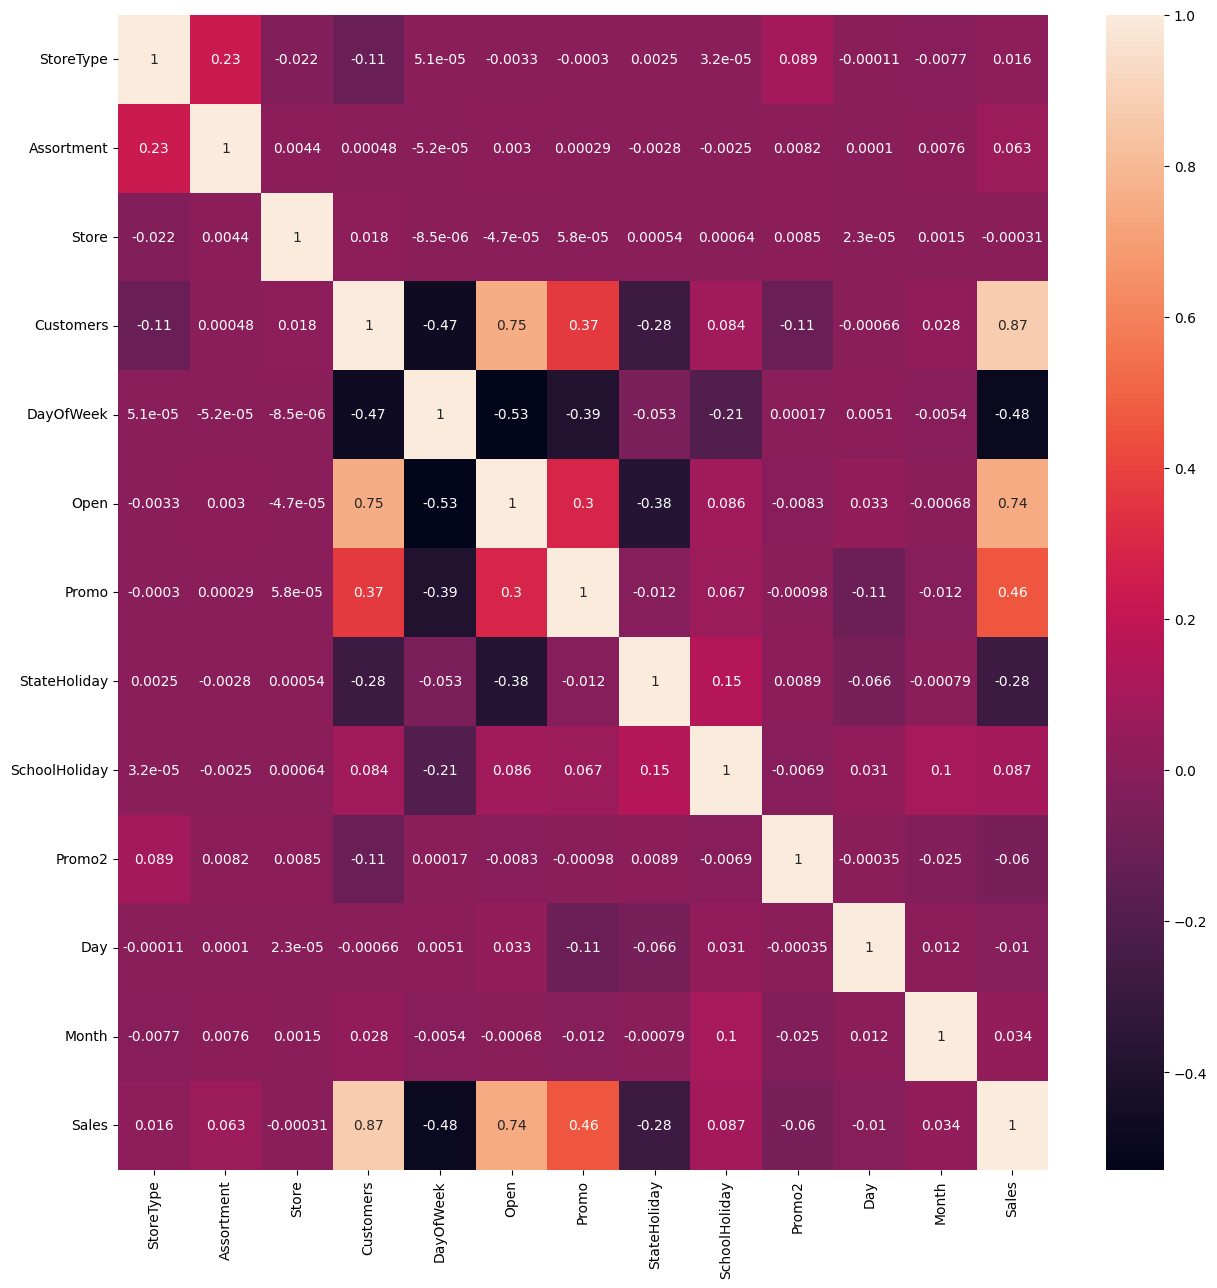

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(merged_new_data.corr(), annot=True)

In [ ]:
merged_new_data['Month'].value_counts()

,count
Month,
5,103695
3,103695
1,103694
6,100350
4,100350
7,98115
2,93660
12,63550
10,63550


In [ ]:
merged_new_data.shape

(1017209, 13)

In [ ]:
merge_data.shape

(1017209, 13)

In [ ]:
X = merged_new_data.drop('Sales', axis=1)
y = merged_new_data['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.8076694303107604

In [ ]:
model.score(X_test, y_test)

0.8092081785078875

In [ ]:
model.coef_

array([ 1.99962446e+02,  1.44579903e+02, -1.23899113e+02,  9.67069926e+03,
       -1.49835319e+01,  1.54952070e+03,  1.02898454e+03, -3.99924603e+02,
        3.95271128e+01,  8.08233733e+01, -2.86631354e-01,  1.59550795e+01])

In [ ]:
model.intercept_

-351.48344568760876

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

2111467.5988559807

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8092081785078875

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
model.score(X_test, y_test)

0.9083783641543891

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
model.score(X_train, y_train)

0.9924771059589715

In [ ]:
model.score(X_test, y_test)

0.9501375525469568

PREDICTION SYSTEM

In [ ]:
merged_new_data.head()

,StoreType,Assortment,Store,Customers,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Promo2,Day,Month,Sales
0,2,0,0.0,0.373737,5,1,1,0,1,0,31,7,5263.0
1,2,0,0.0,0.367677,4,1,1,0,1,0,30,7,5020.0
2,2,0,0.0,0.352189,3,1,1,0,1,0,29,7,4782.0
3,2,0,0.0,0.377104,2,1,1,0,1,0,28,7,5011.0
4,2,0,0.0,0.412121,1,1,1,0,1,0,27,7,6102.0


In [ ]:
merge_data.iloc[300]

,300
Store,1
DayOfWeek,6
Date,2014-10-04
Sales,5355
Customers,621
Open,1
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,c


In [ ]:
merged_new_data.iloc[300]

,300
StoreType,2.000000
Assortment,0.000000
Store,0.000000
Customers,0.418182
DayOfWeek,6.000000
Open,1.000000
Promo,0.000000
StateHoliday,0.000000
SchoolHoliday,0.000000
Promo2,0.000000


In [ ]:

import pandas as pd

def predict_sales(StoreType, Assortment, Store, Customers, DayOfWeek, Open, Promo,
                  StateHoliday, SchoolHoliday, Promo2, Day, Month):

    input_data = pd.DataFrame({
        'StoreType': [StoreType],
        'Assortment': [Assortment],
        'Store': [Store],
        'Customers': [Customers],
        'DayOfWeek': [DayOfWeek],
        'Open': [Open],
        'Promo': [Promo],
        'StateHoliday': [StateHoliday],
        'SchoolHoliday': [SchoolHoliday],
        'Promo2': [Promo2],
        'Day': [Day],
        'Month': [Month]
    })

    prediction = model.predict(input_data)
    return prediction[0]

if __name__ == "__main__":
    StoreType = int(input("Enter StoreType: "))
    Assortment = int(input("Enter Assortment: "))
    Store = float(input("Enter Store: "))
    Customers = float(input("Enter Customers: "))
    DayOfWeek = int(input("Enter DayOfWeek: "))
    Open = int(input("Enter Open: "))
    Promo = int(input("Enter Promo: "))
    StateHoliday = int(input("Enter StateHoliday: "))
    SchoolHoliday = int(input("Enter SchoolHoliday: "))
    Promo2 = int(input("Enter Promo2: "))
    Day = int(input("Enter Day: "))
    Month = int(input("Enter Month: "))

    predicted_sales = predict_sales(StoreType, Assortment, Store, Customers, DayOfWeek, Open, Promo,
                                    StateHoliday, SchoolHoliday, Promo2, Day, Month)

    print(f"The predicted sales for the given data is: {predicted_sales:.2f}")


Enter StoreType: 2
Enter Assortment: 0
Enter Store: 0.000000
Enter Customers: 0.418182
Enter DayOfWeek: 6
Enter Open: 1
Enter Promo: 0
Enter StateHoliday: 0
Enter SchoolHoliday: 0
Enter Promo2: 0
Enter Day: 4
Enter Month: 10
The predicted sales for the given data is: 5182.00


In [ ]:
def predict_sales(StoreType, Assortment, Store, Customers, DayOfWeek, Open, Promo,
                  StateHoliday, SchoolHoliday, Promo2, Day, Month):
    input_data = pd.DataFrame({
        'StoreType': [StoreType],
        'Assortment': [Assortment],
        'Store': [Store],
        'Customers': [Customers],
        'DayOfWeek': [DayOfWeek],
        'Open': [Open],
        'Promo': [Promo],
        'StateHoliday': [StateHoliday],
        'SchoolHoliday': [SchoolHoliday],
        'Promo2': [Promo2],
        'Day': [Day],
        'Month': [Month]
    })

    input_data['StoreType'] = label_encoder.transform(input_data['StoreType'])
    input_data['Assortment'] = label_encoder.transform(input_data['Assortment'])

    input_data[['Store', 'Customers']] = scaler.transform(input_data[['Store', 'Customers']])

    prediction = model.predict(input_data)
    return prediction[0]

if __name__ == "__main__":
    StoreType = input("Enter StoreType: ")
    Assortment = input("Enter Assortment: ")
    Store = int(input("Enter Store: "))
    Customers = int(input("Enter Customers: "))
    DayOfWeek = int(input("Enter DayOfWeek: "))
    Open = int(input("Enter Open: "))
    Promo = int(input("Enter Promo: "))
    StateHoliday = int(input("Enter StateHoliday: "))
    SchoolHoliday = int(input("Enter SchoolHoliday: "))
    Promo2 = int(input("Enter Promo2: "))
    Day = int(input("Enter Day: "))
    Month = int(input("Enter Month: "))


    predicted_sales = predict_sales(StoreType, Assortment, Store, Customers, DayOfWeek, Open, Promo,
                  StateHoliday, SchoolHoliday, Promo2, Day, Month)

    print(f"The predicted sales for the given data is: {predicted_sales:.2f}")

Enter StoreType: c
Enter Assortment: a
Enter Store: 1
Enter Customers: 621
Enter DayOfWeek: 6
Enter Open: 1
Enter Promo: 0
Enter StateHoliday: 0
Enter SchoolHoliday: 0
Enter Promo2: 0
Enter Day: 4
Enter Month: 10
The predicted sales for the given data is: 5162.36
